# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city","city"], how="left")

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby("type")["ride_id"].count()
print(total_rides_by_type)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby("type")["driver_count"].sum()
print(total_drivers_by_type)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [5]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby("type")["fare"].sum()
print(total_fares_by_type)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_by_type = pyber_data_df.groupby("type")["fare"].mean()
print(avg_fare_per_ride_by_type)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64


In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_ride_by_type_driver = total_drivers_by_city_type = total_fares_by_type / total_drivers_by_type
print(avg_fare_per_ride_by_type_driver)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [8]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary = pd.DataFrame({"Total Rides": total_rides_by_type, "Total Drivers": total_drivers_by_type, 
                             "Total Fares": total_fares_by_type, "Average Fare per Ride": avg_fare_per_ride_by_type,
                             "Average Fare per Driver": avg_fare_per_ride_by_type_driver})

pyber_summary.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary.index.name = None


In [10]:
#  8. Format the columns.

# Add thousand comma separators 
def add_commas(x):
    return format(x, ',')

pyber_summary[['Total Rides', 'Total Drivers']] = pyber_summary[['Total Rides', 'Total Drivers']].applymap(add_commas)

# Round numbers
def round_num(x): 
    return round(x,2)

pyber_summary['Total Fares'] = pyber_summary['Total Fares'].apply(round_num)
pyber_summary['Average Fare per Ride'] = pyber_summary['Average Fare per Ride'].apply(round_num)
pyber_summary['Average Fare per Driver'] = pyber_summary['Average Fare per Driver'].apply(round_num)


# Add dollar signs 
def add_dollars(x):
    return '$' + str(x)

pyber_summary['Total Fares'] = pyber_summary['Total Fares'].apply(add_dollars)
pyber_summary['Average Fare per Ride'] = pyber_summary['Average Fare per Ride'].apply(add_dollars)
pyber_summary['Average Fare per Driver'] = pyber_summary['Average Fare per Driver'].apply(add_dollars)

pyber_summary.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.5
Urban,"1,625","2,405",$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.
print(pyber_summary)


         Total Rides Total Drivers Total Fares Average Fare per Ride  \
Rural            125            78    $4327.93                $34.62   
Suburban         625           490   $19356.33                $30.97   
Urban          1,625         2,405   $39854.38                $24.53   

         Average Fare per Driver  
Rural                     $55.49  
Suburban                   $39.5  
Urban                     $16.57  


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

total_fare_by_date = pyber_data_df.groupby(["type","date"])["fare"].sum()

print(total_fare_by_date)

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64


In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

total_fare_by_date = total_fare_by_date.reset_index()


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_fare_by_date_pivot = total_fare_by_date.pivot_table(index='date', columns='type', values='type', aggfunc='sum')
total_fare_by_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.

total_fare_jan_april = total_fare_by_date_pivot.loc['2019-01-01':'2019-04-28']
total_fare_jan_april.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [16]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
total_fare_jan_april.index = pd.to_datetime(total_fare_jan_april.index)

In [17]:
# 6. Check that the datatype for the index is datetime using df.info()

total_fare_jan_april.info()

# datatype for index did not show up using df.info() 
print(total_fare_jan_april.index.dtype)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB
datetime64[ns]


In [18]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_sample = total_fare_jan_april.resample('W').sum()
weekly_sample.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


Text(0.5, 1.0, 'Total Fare by City Type')

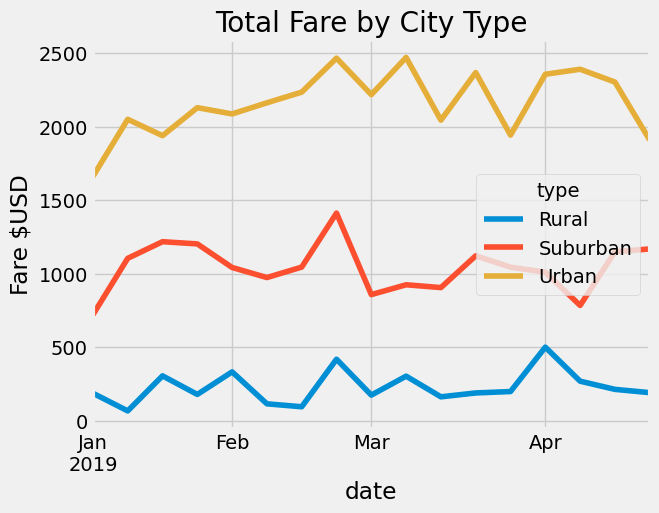

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_sample.plot()

# Add label to y-axis and a title 
plt.ylabel('Fare $USD')
plt.title('Total Fare by City Type')

In [20]:
# Save the graph 

plt.savefig('analysis/PyBer_fare_summary.png')

<Figure size 640x480 with 0 Axes>